In [92]:
# Install packages if you haven't already
%pip install pandas networkx numpy matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [93]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [94]:
df = pd.read_csv("NFA 2018.csv")
df.head()

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
0,Armenia,ARM,Asia,Western Asia,1992,BiocapPerCap,1.611286e-01,0.135023,0.083836,0.013718,0.033669,0.000000e+00,4.273741e-01,949.033,3449000
1,Armenia,ARM,Asia,Western Asia,1992,BiocapTotGHA,5.558130e+05,465763.337400,289190.662300,47320.224590,116139.598200,0.000000e+00,1.474227e+06,949.033,3449000
2,Armenia,ARM,Asia,Western Asia,1992,EFConsPerCap,3.909225e-01,0.189137,0.000001,0.004138,0.033669,1.112225e+00,1.730092e+00,949.033,3449000
3,Armenia,ARM,Asia,Western Asia,1992,EFConsTotGHA,1.348487e+06,652429.066600,4.327841,14272.803690,116139.598200,3.836620e+06,5.967954e+06,949.033,3449000
4,Armenia,ARM,Asia,Western Asia,1992,EFExportsPerCap,1.124910e-03,0.002283,0.000000,0.000438,0.000000,4.819043e-02,5.203676e-02,949.033,3449000


In [95]:
latest_year = df['year'].max() # only using latest year for simplicity
df = df[df['year'] == latest_year]

features = ['crop_land', 'grazing_land', 'forest_land', 'fishing_ground']
X = df[features].values

df = df.dropna(subset=features)
X = df[features].values

In [96]:
similarity_matrix = cosine_similarity(X)
sim_df = pd.DataFrame(similarity_matrix, index=df['country'], columns=df['country'])
sim_df.head()

country,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,Armenia,...,World,World,World,World,World,World,World,World,World,World
country,,,,,,,,,,,,,,,,,,,,,
Armenia,1.000000,1.000000,0.949269,0.949269,0.832525,0.832525,0.908157,0.908157,0.951742,0.951742,...,0.756484,0.756484,0.902308,0.902308,0.876770,0.876770,0.886888,0.886888,0.902308,0.902308
Armenia,1.000000,1.000000,0.949269,0.949269,0.832525,0.832525,0.908157,0.908157,0.951742,0.951742,...,0.756484,0.756484,0.902308,0.902308,0.876770,0.876770,0.886888,0.886888,0.902308,0.902308
Armenia,0.949269,0.949269,1.000000,1.000000,0.844881,0.844881,0.973533,0.973533,0.990163,0.990163,...,0.861264,0.861264,0.983467,0.983467,0.977702,0.977702,0.981948,0.981948,0.983467,0.983467
Armenia,0.949269,0.949269,1.000000,1.000000,0.844881,0.844881,0.973533,0.973533,0.990163,0.990163,...,0.861264,0.861264,0.983467,0.983467,0.977702,0.977702,0.981948,0.981948,0.983467,0.983467
Armenia,0.832525,0.832525,0.844881,0.844881,1.000000,1.000000,0.903901,0.903901,0.793015,0.793015,...,0.641396,0.641396,0.868038,0.868038,0.772055,0.772055,0.779187,0.779187,0.868038,0.868038


In [97]:
G = nx.Graph()

for country in df['country']:
    G.add_node(country)

threshold = 0.92

for i, country1 in enumerate(df['country']):
    for j, country2 in enumerate(df['country']):
        if i < j and sim_df.iloc[i, j] > threshold:
            G.add_edge(country1, country2, weight=sim_df.iloc[i, j])


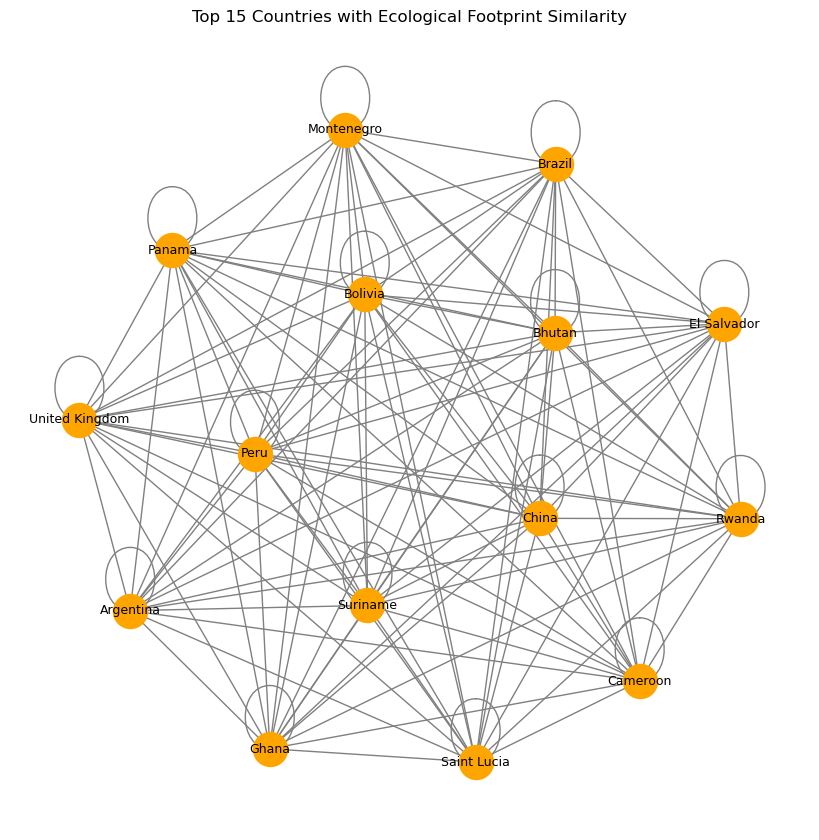

In [98]:

deg_centrality = nx.degree_centrality(G)

top_countries = sorted(deg_centrality, key=deg_centrality.get, reverse=True)[:15]

H = G.subgraph(top_countries)

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(H, k=0.4)
nx.draw(
    H, pos,
    with_labels=True,
    node_color='orange',
    node_size=600,
    font_size=9,
    edge_color='gray'
)
plt.title("Top 15 Countries with Ecological Footprint Similarity")
plt.show()


In [100]:
import networkx as nx

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Sort and get the top 10
top_countries = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:15]

for country, centrality in top_countries:
    print(f"{country}: {centrality:.3f}")

El Salvador: 1.000
Peru: 1.000
Brazil: 0.994
Ghana: 0.988
Suriname: 0.988
Argentina: 0.982
Bhutan: 0.982
Panama: 0.982
Bolivia: 0.976
Cameroon: 0.976
Rwanda: 0.976
Saint Lucia: 0.976
United Kingdom: 0.976
Montenegro: 0.976
China: 0.976
